Task:

Generate a random adjacency matrix for a simple undirected unweighted graph with 100 vertices and 200 edges (note that the matrix should be symmetric and contain only 0s and 1s as elements). Transfer the matrix into an adjacency list. Visualize the graph and print several rows of the adjacency matrix and the adjacency list. Which purposes is each representation more convenient for?


In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from queue import Queue

In [2]:
#generation of random adjacency matrix
def adj_matrix(num_vert, num_edg):
    matrix = np.zeros((num_vert, num_vert))
    num_uniq_elem = (num_vert**2 - num_vert) // 2
    edg = [1 if x < num_edg else 0 for x in range(num_uniq_elem)]
    random.shuffle(edg)
    n = 0
    for i in range(1, num_vert):
        for j in range(i):
            matrix[i, j], matrix[j, i] = edg[n], edg[n]
            n += 1
    return matrix

In [3]:
#conversion from adjacency matrix to list
def matrix_to_list(matrix):
    adj_list = {}
    for num, x in enumerate(matrix):
        edges = []
        for i in range(len(x)):
            if x[i] == 1:
                edges.append(i)
        adj_list[num] = edges
    return adj_list

In [4]:
def matrix_to_df(matrix):
    columns = list(range(len(matrix)))
    df = pd.DataFrame(columns=columns, data=matrix)
    return df   

In [5]:
def list_to_df(adj_list):
    columns = ['Vertex', 'Adjacency vertices']
    data = [' '.join([str(e) for e in x]) for x in adj_list.values()]
    df = pd.DataFrame()
    df['Vertex'] = adj_list.keys()
    df['Adjacency vertices'] = data
    return df 

In [ ]:
matrix = adj_matrix(100, 200)

In [6]:
matrix = np.load('matrix.npy')

In [ ]:
np.save('matrix', matrix)

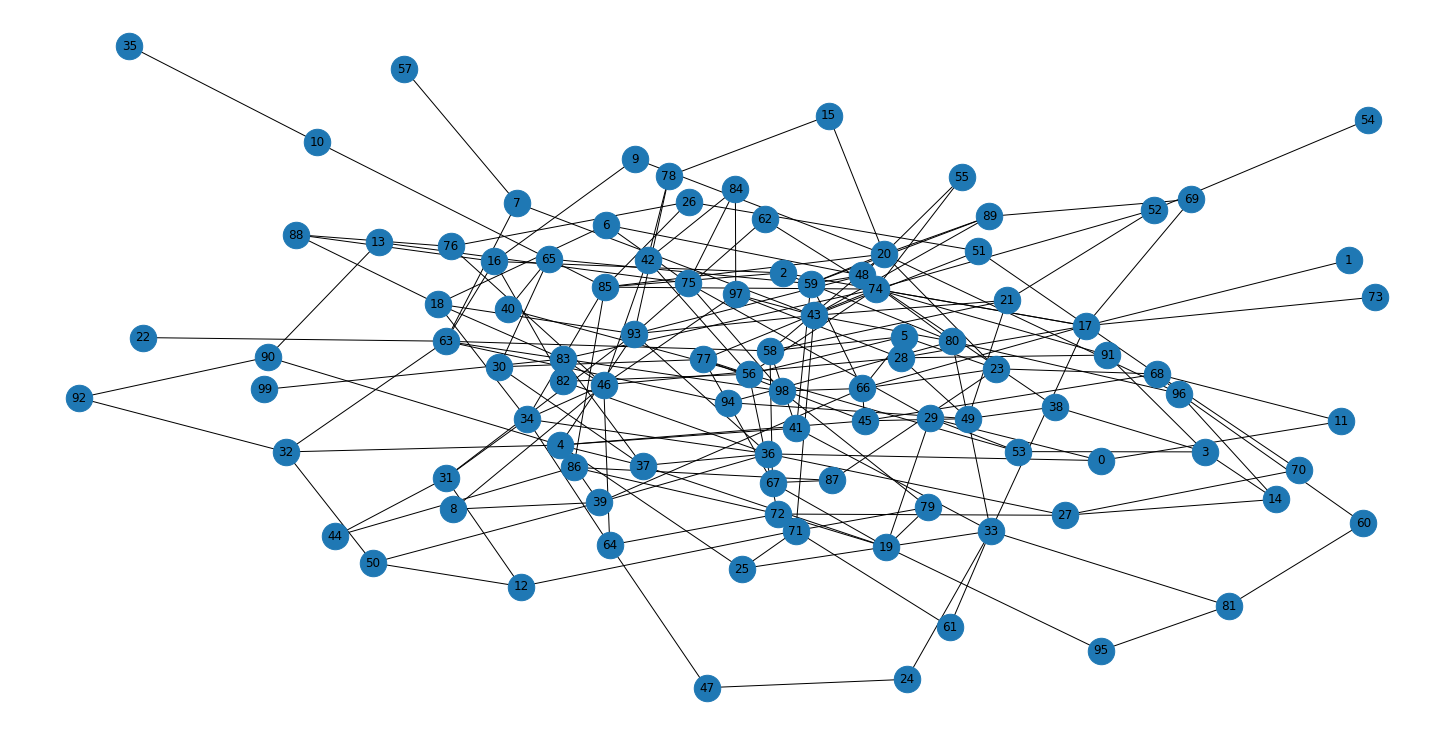

In [16]:
#graph vizualization
plt.figure(figsize=(20,10))
G = nx.Graph(matrix)
nx.draw(G, node_size=700,  with_labels=True)

In [8]:
df_matrix = matrix_to_df(matrix)
#df_matrix.to_excel("matrix.xlsx") 
df_matrix.astype('int32')

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
adj_list = matrix_to_list(matrix)
df_list = list_to_df(adj_list)
df_list


,Vertex,Adjacency vertices
0,0,11 29 36
1,1,17
2,2,16 17 80 85
3,3,14 38 53 91
4,4,25 32 37 39 41 45 90 93
...,...,...
95,95,19 81
96,96,14 20 60 68 80
97,97,28 43 46 84
98,98,66 75 79 83


## Section 2

Use Depth-first search to find connected components of the graph and Breadth-first search to find a shortest path between two random vertices. Analyse the results obtained.

In [10]:
#Depth-first search
def dfs(graph, node, visited=[], num=0):
    if node not in visited:
        num += 1
        visited.append(node)
        for neighbour in graph[node]:
            num += dfs(graph, neighbour, visited)
    return num

In [11]:
dfs(adj_list, 0, [])

100

In [12]:
#Breadth-first search
def bff(graph, start_node, finish_node):
    n = 0
    q = Queue()
    visited = [start_node]
    n_visited= [0]
    q.put((start_node, 0))
    
    
    #passing through graph
    while not q.empty():
        node, n = q.get()
        if node == finish_node:
                print(f"Shortest path between node {start_node} and node {finish_node} takes {n} steps.")
                break
        else:
            for neig in graph[node]:
                if neig not in visited:
                    visited.append(neig)
                    n_visited.append(n+1)
                    q.put((neig, n+1))
        if q.empty():
            print("Element not found")
            return
                
    
    #returning shortest way
    way = [str(node)]
    for pr_node, k in zip(visited[::-1], n_visited[::-1]):
        if k == n - 1 and pr_node in graph[node]:
            way.append(str(pr_node))
            node = pr_node
            n -= 1
    print(f"Shortest path: {' -> '.join(way[::-1])}.")



In [13]:
bff(adj_list, 7, 56)

Shortest path between node 7 and node 56 takes 4 steps.
Shortest path: 7 -> 63 -> 94 -> 77 -> 56.
